In [1]:
# 导入库
import numpy as np  # numpy库
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet,Lasso,Ridge  # 批量导入要实现的回归算法
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
import pandas as pd  # 导入pandas
import matplotlib.pyplot as plt  # 导入图形展示库

In [2]:
# 数据准备
raw_data = pd.read_csv("resultCsv.csv",encoding="gbk")  # 读取数据文件
raw_data

,薪资,所在地,经验要求,学历要求,规模,职位简介_0,职位简介_1,职位简介_2,职位简介_3,职位简介_4,...,领域_40,领域_41,领域_42,领域_43,领域_44,领域_45,领域_46,领域_47,领域_48,领域_49
0,9000,8791.93,1.0,2,3000,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9000,6731.10,1.0,2,3000,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,25000,8791.93,3.5,2,325,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,7000,5892.87,0.0,1,100,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,21500,8791.93,6.0,2,3000,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,6500,8791.93,1.0,2,100,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1254,12500,6731.10,0.0,3,50,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1255,9000,8791.93,3.5,2,50,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,8500,5621.98,1.0,2,325,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
#随机森林筛选变量
X = raw_data[["经验要求","学历要求","所在地","规模","领域_19","公司详情_46","领域_34","职位详情_41",
              "职位详情_24","领域_22","职位简介_45","职位简介_15","职位详情_33","领域_35","职位详情_25"]]  # 分割自变量
y = raw_data["薪资"]  # 分割因变量

In [4]:
#Forward筛选变量
X = raw_data[["经验要求","学历要求","所在地","职位详情_25","职位简介_24","职位简介_45","公司详情_46","领域_9",
             "领域_33","领域_35"]]  # 分割自变量
y = raw_data["薪资"]  # 分割因变量

In [5]:
#Backward筛选变量
X = raw_data[["经验要求","学历要求","所在地","规模","职位简介_24","职位简介_45","职位详情_25","职位详情_41",
             "公司详情_46","领域_9","领域_17","领域_33","领域_35"]]  # 分割自变量
y = raw_data["薪资"]  # 分割因变量

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

samples: 1258 	 features: 13
----------------------------------------------------------------------
cross validation result:
                         0         1         2         3         4         5  \
BayesianRidge     0.079714  0.119193  0.127456  0.014356 -0.054146  0.142088   
LinearRegression  0.481535  0.299562  0.495608  0.544459  0.428444  0.342975   
ElasticNet        0.382157  0.306101  0.409703  0.483591  0.341816  0.392954   
GBR               0.532088  0.303200  0.499070  0.544574  0.421243  0.325637   
Ridge             0.480230  0.300687  0.495092  0.545816  0.427508  0.348331   
Lasso             0.480684  0.300085  0.495162  0.544951  0.427914  0.344577   
MLP               0.083930  0.114886  0.124928  0.025936 -0.039109  0.143389   

                         6         7         8         9  
BayesianRidge     0.192147  0.119161  0.046050 -0.019646  
LinearRegression  0.441412  0.412749  0.471845  0.113693  
ElasticNet        0.395787  0.377367  0.408408  0.202483 

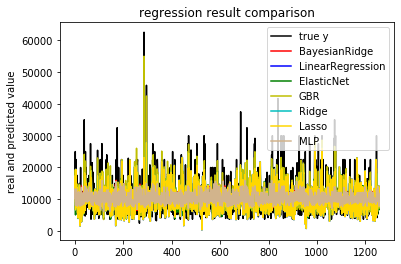

In [6]:
# 训练回归模型
n_folds = 10  # 设置交叉检验的次数
model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_lr = LinearRegression()  # 建立普通线性回归模型对象
model_etc = ElasticNet()  # 建立弹性网络回归模型对象
model_Ridge = Ridge()  # 建立岭回归模型对象
model_Lasso = Lasso()  # 建立LASSO模型对象
model_MLP = MLPRegressor()  # 建立神经网络回归模型对象
model_gbr = GradientBoostingRegressor()  # 建立梯度增强回归模型对象
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'GBR','Ridge','Lasso','MLP']  # 不同模型的名称列表
model_dic = [model_br, model_lr, model_etc, model_gbr,model_Ridge,model_Lasso,model_MLP]  # 不同回归模型对象的集合
cv_score_list = []  # 交叉检验结果列表
pre_y_list = []  # 各个回归模型预测的y值列表
for model in model_dic:  # 读出每个回归模型对象
    scores = cross_val_score(model, X, y, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
    cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
    pre_y_list.append(model.fit(X, y).predict(X))  # 将回归训练中得到的预测y存入列表
# 模型效果指标评估
n_samples, n_features = X.shape  # 总样本量,总特征数
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(7):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y, pre_y_list[i])  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('cross validation result:')  # 打印输出标题
print (df1)  # 打印输出交叉检验的数据框
print (70 * '-')  # 打印分隔线
print ('regression metrics:')  # 打印输出标题
print (df2)  # 打印输出回归指标的数据框
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ev \t explained_variance')
print ('mae \t mean_absolute_error')
print ('mse \t mean_squared_error')
print ('r2 \t r2')
print (70 * '-')  # 打印分隔线
# 模型效果可视化
plt.figure()  # 创建画布
plt.plot(np.arange(X.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c','gold','tan']  # 颜色列表
linestyle_list = ['-', '.', 'o', 'v', '*','D','|']  # 样式列表
for i, pre_y in enumerate(pre_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(X.shape[0]), pre_y_list[i], color_list[i], label=model_names[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [7]:
model_gbr.feature_importances_

array([0.46314907, 0.15983328, 0.16894113, 0.05580867, 0.03421978,
       0.0166085 , 0.0252186 , 0.01024053, 0.01934482, 0.02078537,
       0.0046769 , 0.0097577 , 0.01141566])

In [8]:
result_rf = df2

In [9]:
result_fw = df2

In [10]:
result_bw = df2

In [11]:
result_rf['data']='rf'
result_fw['data']='fw'
result_bw['data']='bw'

In [12]:
result = result_rf.append(result_fw)
result = result.append(result_bw)
result = result.sort_index(axis=0,ascending=False,by=['ev'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
result

,ev,mae,mse,r2,data
GBR,0.649275,2521.933636,1.233987e+07,0.649275,bw
GBR,0.649275,2521.933636,1.233987e+07,0.649275,bw
GBR,0.649275,2521.933636,1.233987e+07,0.649275,bw
LinearRegression,0.453716,3113.555628,1.922041e+07,0.453716,bw
LinearRegression,0.453716,3113.555628,1.922041e+07,0.453716,bw
LinearRegression,0.453716,3113.555628,1.922041e+07,0.453716,bw
Lasso,0.453710,3113.158024,1.922060e+07,0.453710,bw
Lasso,0.453710,3113.158024,1.922060e+07,0.453710,bw
Lasso,0.453710,3113.158024,1.922060e+07,0.453710,bw
Ridge,0.453693,3112.863692,1.922121e+07,0.453693,bw


In [14]:
data_pred_3= raw_data[["经验要求","学历要求","所在地","规模","职位简介_24","职位简介_45","职位详情_25","职位详情_41",
             "公司详情_46","领域_9","领域_17","领域_33","领域_35"]]
data_pred_3 = data_pred_3[data_pred_3['经验要求']==0]
data_pred_3['经验要求']=float(3)
data_pred_3

,经验要求,学历要求,所在地,规模,职位简介_24,职位简介_45,职位详情_25,职位详情_41,公司详情_46,领域_9,领域_17,领域_33,领域_35
3,3.0,1,5892.87,100,1,0,0,1,0,0,1,0,0
8,3.0,2,6301.99,3000,0,1,0,0,0,0,1,0,0
14,3.0,0,6066.44,50,1,0,0,0,0,0,1,0,0
15,3.0,0,6731.10,325,1,1,0,0,0,0,1,0,0
22,3.0,0,5621.98,325,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,3.0,1,6055.40,3000,0,0,0,0,0,0,0,0,0
1233,3.0,2,8791.93,100,0,0,0,0,0,0,1,0,0
1247,3.0,1,8791.93,100,0,0,0,0,0,0,0,0,0
1250,3.0,0,6731.10,325,1,1,0,0,0,0,1,0,0


In [24]:
# 模型应用
print ("regression prediction")
new_point_set = data_pred_3  # 要预测的新数据集
pred = pd.DataFrame(columns=["预测薪资"])
for i,row in data_pred_3.iterrows():
    new_point = np.array(row).reshape(1,-1)# 循环读出每个要预测的数据点
    new_pre_y = model_gbr.predict(new_point)  # 使用GBR进行预测
    a=pd.DataFrame({"预测薪资":new_pre_y})
    pred = pred.append(a)
    print ("predict for new point %d is:  %.2f" % (i,new_pre_y))  # 打印输出每个数据点的预测信息

regression prediction
predict for new point 3 is:  7890.84
predict for new point 8 is:  11110.88
predict for new point 14 is:  7843.19
predict for new point 15 is:  11139.22
predict for new point 22 is:  8645.55
predict for new point 23 is:  12693.80
predict for new point 28 is:  7065.48
predict for new point 30 is:  14430.59
predict for new point 31 is:  14553.19
predict for new point 32 is:  9540.86
predict for new point 67 is:  14171.77
predict for new point 78 is:  9639.41
predict for new point 81 is:  9260.00
predict for new point 89 is:  15152.36
predict for new point 96 is:  11539.24
predict for new point 97 is:  11429.23
predict for new point 101 is:  10170.01
predict for new point 110 is:  13038.87
predict for new point 116 is:  11099.50
predict for new point 130 is:  18640.25
predict for new point 146 is:  7683.65
predict for new point 148 is:  5598.37
predict for new point 153 is:  16426.13
predict for new point 156 is:  9104.85
predict for new point 174 is:  15190.05
predic

In [25]:
data_pred_4= raw_data[["薪资","经验要求"]]
data_pred_4 = data_pred_4[data_pred_4['经验要求']==0]
data_pred_4 = data_pred_4.reset_index()
pred = pred.reset_index()

In [ ]:
data_pred_4["预测薪资"] = pred["预测薪资"]
data_pred_4["推荐系数"] = (data_pred_4["预测薪资"]-data_pred_4["薪资"])/data_pred_4["薪资"]

In [72]:
final_data0 = pd.read_excel("data2.xlsx")  # 读取数据文件
final_data = final_data0
final_data = final_data[final_data['经验要求']==0]
final_data = final_data[['职位名称', '薪资', '所在地','学历要求','招聘人数','公司名称','类型','领域']]
#final_data = final_data.reset_index()

In [73]:
salary_data= pd.read_excel("2020年城市人均工资标准.xlsx")
salary_data.head()
for i,j in zip(salary_data["城市"],salary_data["平均工资"]):
    final_data["所在地"]= final_data["所在地"].replace(i, j) 
final_data = final_data.rename(columns={'所在地':'所在地薪资'})
final_data["所在地"] = final_data0["所在地"]
final_data = final_data.reset_index()
final_data

,index,职位名称,薪资,所在地薪资,学历要求,招聘人数,公司名称,类型,领域,所在地
0,3,数据分析师,7000,5892.87,大专,5,南通普思商务信息咨询有限公司,民营公司,金融/投资/证券,南通
1,8,17117N-数据分析岗 (职位编号：17117N),10417,6301.99,本科,1,平安普惠企业管理有限公司重庆分公司,上市公司,金融/投资/证券,重庆
2,14,（非销售）8K聘金融外汇交易员数据分析师双休五险,7000,6066.44,高中,8,西安嘉恒玖富网络科技有限公司,外资（欧美）,金融/投资/证券,西安
3,15,数据分析师（6k+提成+双休）,13000,6731.10,中专,5,广东兆丰恒业控股集团有限公司,民营公司,金融/投资/证券,广州
4,22,大数据分析师,7000,5621.98,高中,3,青岛小笨象电影科技有限公司,民营公司,计算机软件,青岛
...,...,...,...,...,...,...,...,...,...,...
145,1234,银行综合内勤（偏数据双休）,4000,6055.40,大专,1,长沙惠邦网络科技有限公司,民营公司,银行,贵阳
146,1235,金融工程研究员,12500,8791.93,本科,2,湘财基金管理有限公司,民营公司,金融/投资/证券,上海
147,1249,研发技术员,8000,8791.93,大专,5,上海一芯生物技术有限公司,民营公司,医疗设备/器械,上海
148,1252,技术分析员（6k+提成+双休）,13000,6731.10,中专,6,广东兆丰恒业控股集团有限公司,民营公司,金融/投资/证券,广州


In [74]:
final_data["预测薪资"] = pred["预测薪资"]
final_data["推荐系数"] = ((final_data["薪资"]/final_data["所在地薪资"])**2)*(final_data["预测薪资"]-final_data["薪资"])/final_data["薪资"]
final_data = final_data.sort_index(axis=0,ascending=False,by=["推荐系数"])
final_data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,index,职位名称,薪资,所在地薪资,学历要求,招聘人数,公司名称,类型,领域,所在地,预测薪资,推荐系数
22,153,数据分析师,8500,6731.10,本科,若干,广州易幻网络科技有限公司,上市公司,网络游戏,广州,16426.131756,1.486990
55,403,数据分析专员,6000,6731.10,本科,若干,广州市漫灵软件有限公司,民营公司,网络游戏,广州,15385.626666,1.242918
115,897,数据分析岗,9000,6100.01,硕士,若干,中原证券股份有限公司,国企,金融/投资/证券,郑州,13830.445883,1.168338
121,938,东南亚本地化运营,5000,6731.10,本科,1,广州游爱网络技术有限公司,上市公司,网络游戏,广州,15359.147254,1.143199
73,552,大数据分析师,5250,8791.93,本科,2,诺贝尔曼（上海）商业投资管理有限公司,民营公司,物业管理/商业中心,上海,21656.043980,1.114281
...,...,...,...,...,...,...,...,...,...,...,...,...
25,178,大数据分析研究人员,20000,5460.67,硕士,5,大连东软教育科技集团有限公司,民营公司,多元化业务集团公司,大连,17640.633861,-1.582463
47,288,金融数据分析员 (职位编号：1),12500,5885.88,大专,10,南昌奥高信息咨询有限公司,民营公司,金融/投资/证券,南昌,7317.827935,-1.869817
131,1008,（D01002）高薪销售精英（远程面试+免费培训） (职位编号：D01002),27500,8791.93,大专,20,上海轻轻信息科技有限公司,民营公司,教育/培训/院校,上海,14680.451982,-4.560757
128,972,（D01002）高薪销售精英（远程面试+免费培训） (职位编号：D01002),27500,8791.93,大专,20,上海轻轻信息科技有限公司,民营公司,教育/培训/院校,上海,14680.451982,-4.560757


In [75]:
final_data.to_excel("final_result2.xlsx",index = False)